In [49]:

from transformers import ASTConfig, ASTForAudioClassification, ASTFeatureExtractor
import sys

sys.path.append("..")
from settings import NUM_CLASSES

config = ASTConfig.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
config.num_labels = NUM_CLASSES
config.max_length = 100
feature_extractor = ASTFeatureExtractor.from_dict(config.to_dict())

from dataset.training_dataset import SpeechDataset

dataset = SpeechDataset("/home/simonexc/Documents/GitHub/MINI_DL_RNN/src/artifacts/speech-waveform:v0", 10, None, None)

dataset.setup()
x = dataset.train.tensors[0]
a = feature_extractor(x.numpy()[:2], sampling_rate=16000, return_tensors="pt").input_values
a

tensor([[[-1.2085, -1.2776, -1.0095,  ..., -0.8288, -0.8679, -1.0219],
         [-1.1539, -1.2776, -1.1386,  ..., -0.8342, -0.8523, -1.0356],
         [-1.2422, -1.2776, -1.0265,  ..., -0.7492, -0.8790, -1.0934],
         ...,
         [-1.0817, -1.2776, -1.0806,  ..., -0.7813, -1.0041, -1.0816],
         [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670],
         [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670]],

        [[-0.3972, -0.8123, -0.4355,  ..., -0.5910, -0.6742, -1.0093],
         [-0.2405, -0.7163, -0.3395,  ..., -0.6230, -0.8376, -1.0217],
         [-0.2945, -0.7072, -0.3304,  ..., -0.5740, -0.8318, -1.1117],
         ...,
         [-0.2491, -0.5579, -0.1811,  ..., -0.6200, -0.7538, -0.9327],
         [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670],
         [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670]]])

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectogram(data):
    # Plot the matrix
    plt.figure(figsize=(10, 4))
    plt.imshow(data.numpy(), aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(label='Intensity')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Spectrogram')
    plt.show()


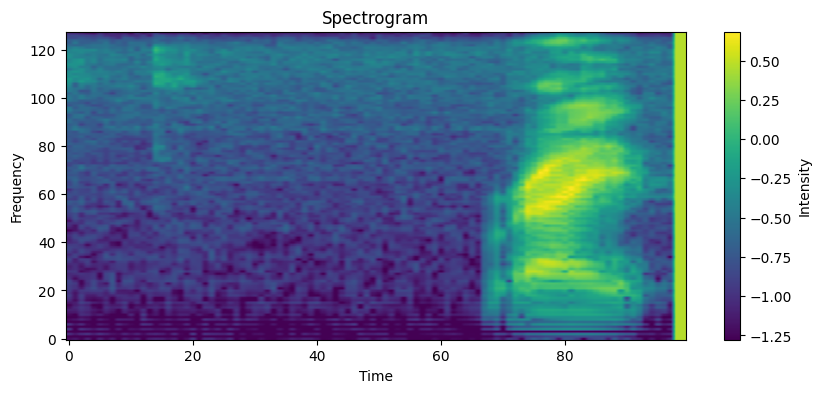

In [20]:
plot_spectogram(a[0].T)

In [4]:
from IPython.display import Audio, display
def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")

In [5]:
play_audio(x[0].view(1, -1), 16000)

torch.Size([2, 125, 128]) torch.Size([2, 100, 128])


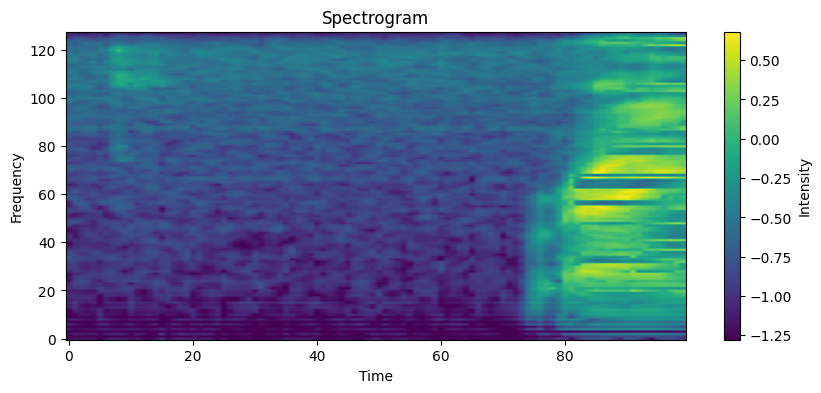

In [53]:
import torchaudio.transforms as T
import torch
stretch = T.TimeStretch(n_freq=128)

augmented = stretch(torch.complex(a, torch.zeros(a.shape)).transpose(1, 2), 0.8).real.transpose(1, 2)
print(augmented.shape, a.shape)
#plot_spectogram(a[0].T)
#plot_spectogram(augmented[0])
indices = torch.tensor([10, 20])
plot_spectogram(torch.cat([augmented[i, val:val+100].unsqueeze(0) for i, val in enumerate(indices)], dim=0)[0].T)

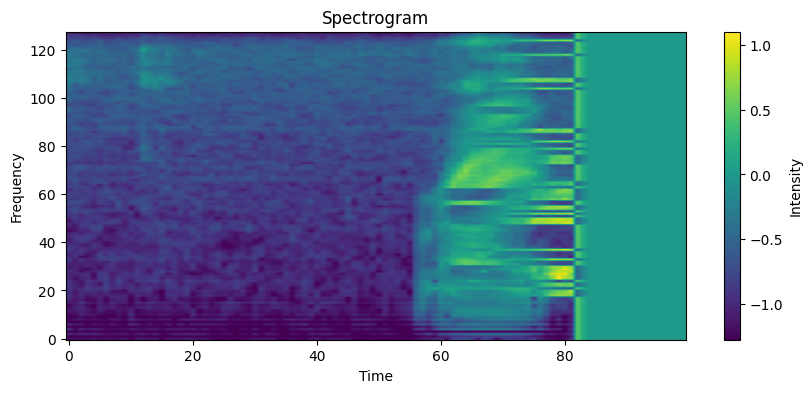

In [54]:
augmented = stretch(torch.complex(a, torch.zeros(a.shape)).transpose(1, 2), 1.2).real.transpose(1, 2)
plot_spectogram(torch.nn.functional.pad(augmented, (0, 0, 0, 100 - augmented.shape[1]))[0].T)

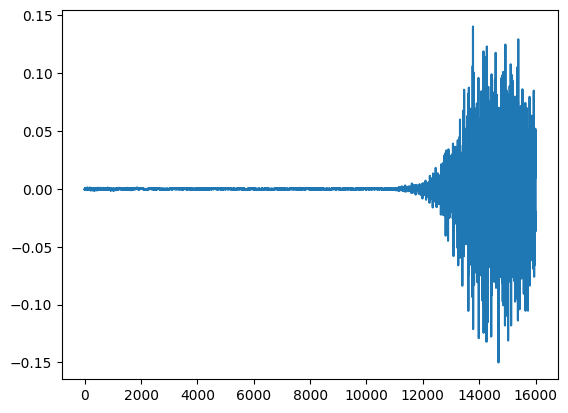

In [8]:
import librosa
import torch


augmented = torch.tensor(librosa.effects.time_stretch(y=x[:1].numpy(), rate=0.7))
ind = np.random.randint(0, int(16000/0.8) - 16000)

plt.plot(augmented[0, ind:ind+16000])
plt.show()

tensor([[0.0005, 0.0010, 0.0013,  ..., 0.0016, 0.0013, 0.0001]])


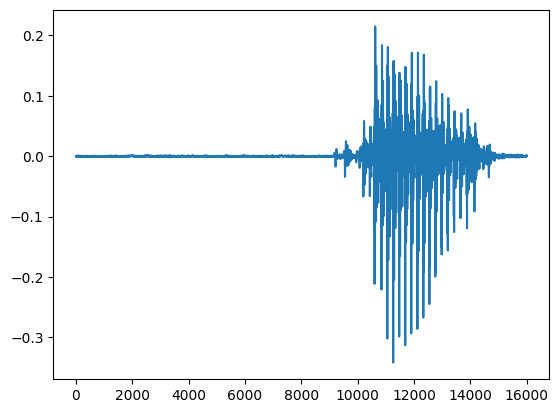

In [62]:
import librosa
import torch
speed_perturbation = T.SpeedPerturbation(16000, [0.7])

augmented, _ = speed_perturbation(x[:1])
print(augmented)
ind = np.random.randint(0, int(16000/0.7) - 16000)

plt.plot(augmented[0, ind:ind+16000])
plt.show()

In [63]:
play_audio(augmented[0].view(1, -1), 16000)

In [10]:
import torchaudio.transforms as T

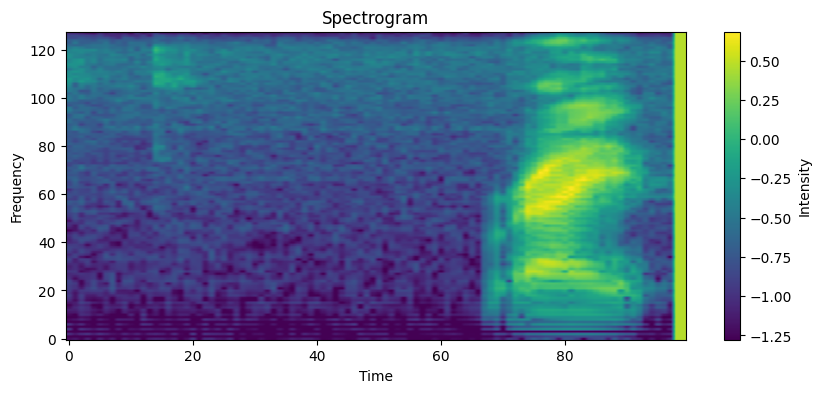

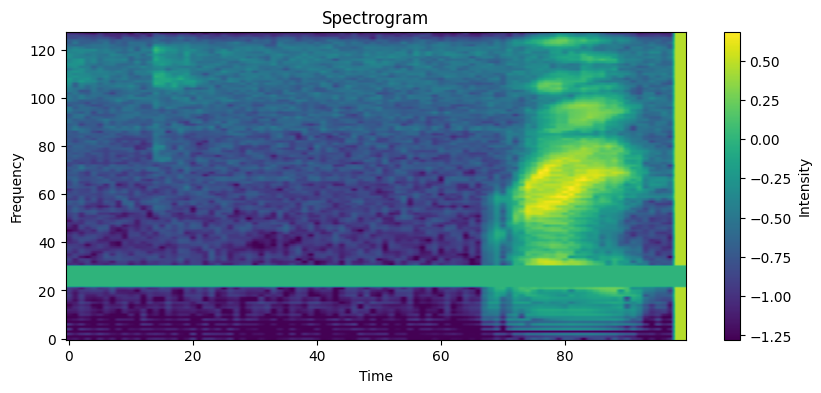

In [17]:
mask = T.FrequencyMasking(freq_mask_param=50)
augmented = mask(a.transpose(1, 2)).transpose(1, 2)
plot_spectogram(a[0].T)
plot_spectogram(augmented[0].T)